<a href="https://colab.research.google.com/github/bielzin42/NasaSpaceAppsDevlopmentArea-100.py/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WELCOME TO HELL**

In [0]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D


In [0]:
###Chamando os nossos data sets
#Neste data set temos os dados do John Hopinkings + o de poluição unidos
pm_data = pd.read_csv("jon_pm.csv",sep =";", decimal=",") 
#Neste data set temos 
age_data = pd.read_csv("dataset_ML.csv",sep =";", decimal=",")
#Reajustando o data set age_data
#age_data["Crude Rate"] = age_data["Crude Rate_0_14"] +  age_data["Crude Rate_15_44"] + age_data["Crude Rate_45_64"] +  age_data["Crude Rate_65"]
#age_data = age_data.iloc[:,[0,1,2,3]]#8
print(age_data)


## **Regressão Linear Multipla**

0
intercept: [0.14390596]
slope: [[6.69577829 2.46944936]]
coefficient of determination: 0.37334189940216095


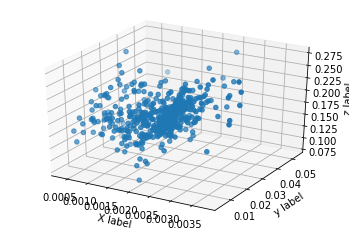

1
intercept: [0.25673375]
slope: [[18.03056491  1.47388388]]
coefficient of determination: 0.38307757177620927


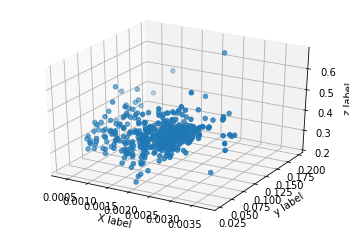

2
intercept: [0.29182162]
slope: [[-19.09403612   0.03839216]]
coefficient of determination: 0.16972638551093921


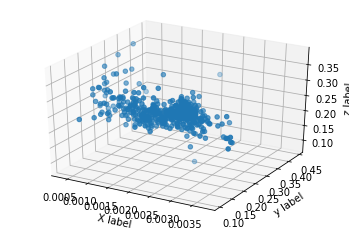

3
intercept: [-0.22765698]
slope: [[-4.6650717   0.54797398]]
coefficient of determination: 0.4394078502923331


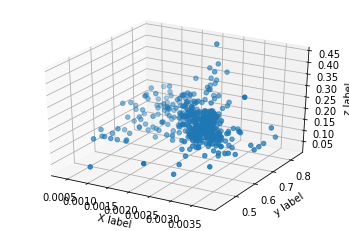

4
intercept: [0.02391179]
slope: [[2.38988711 0.25004532]]
coefficient of determination: 0.07501714048220509


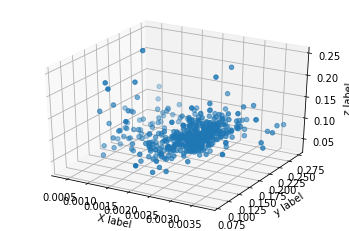

In [101]:
##Modelo de Regreção Linear
model = LinearRegression()

##Fornecendo os dados pm_data
#x = np.array(pm_data.iloc[:,[1]]).reshape((-1, 1))
#y = np.array(pm_data.iloc[:,[2]])

##Fornecendo os dados age_data
for i in range(5):
  x = np.array(age_data.iloc[0:466,[1,i+2]])#.reshape((-1, 1))
  y = np.array(age_data.iloc[0:466,[i+6]])
  print(i)

  #Encontrando os coeficientes lineares e angulares
  model.fit(x, y)
  intercept1, coefficients1 = model.intercept_, model.coef_
  print('intercept:', model.intercept_)
  print('slope:', model.coef_)

  #Encontrando R²
  r_sq = model.score(x, y)
  print('coefficient of determination:', r_sq)

  #Grafico
  X, Y, Z = x[:,0], x[:,1], y
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = "3d")
  ax.scatter(X, Y, Z)
  ax.set_xlabel('X label')
  ax.set_ylabel('y label')
  ax.set_zlabel('z label')
  
  ##2D
  #plt.figure(i)
  #plt.scatter(x, y,  color='black')
  #plt.plot(x, y, color='blue', linewidth=3)
  plt.show()


##PREVISÃO
## y_pred = model.predict(x)
## print('predicted response:', y_pred, sep='\n')

## y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
## print('predicted response:', y_pred, sep='\n')

## **Regressão Polinomial Multipla**

0
coefficient of determination: 0.950630184941194
intercept: [-13721.55054823]
coefficients: [[ 7.95286248e+03  5.37448979e+01 -7.59321978e+02  1.04463246e+00
  -3.35417312e-04]]


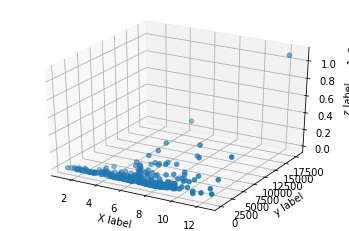

1
coefficient of determination: 0.9774280331516159
intercept: [113009.41070873]
coefficients: [[-1.19191828e+04  2.09521500e+02 -1.34400266e+03  2.64938696e+01
  -6.27958679e-04]]


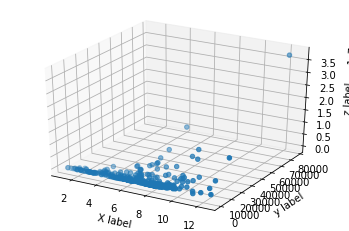

2
coefficient of determination: 0.9789179384355111
intercept: [296506.00774156]
coefficients: [[-8.61041670e+04  1.87495889e+02  2.86467994e+03  1.49480220e+01
   7.61567526e-05]]


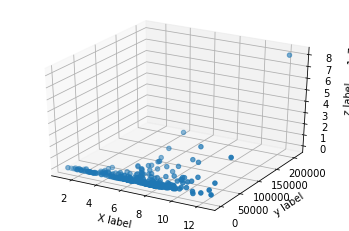

3
coefficient of determination: 0.9828187181038724
intercept: [245734.31261069]
coefficients: [[-6.83683251e+04  2.79956788e+01  4.47009423e+03  1.80859551e+00
   2.92656959e-06]]


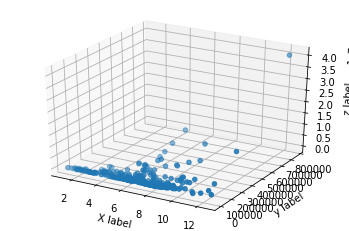

4
coefficient of determination: 0.9917305510124979
intercept: [-11322.07611384]
coefficients: [[ 9.71378343e+03  1.87654937e+01 -1.44339586e+03 -1.36504038e-01
   7.69834518e-07]]


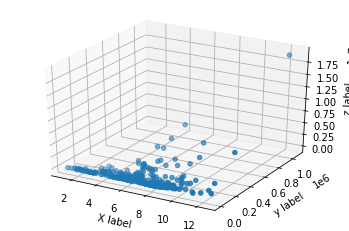

In [138]:
from sklearn.preprocessing import PolynomialFeatures

##Fornecendo os dados age_data
for i in range(5):
  x = np.array(age_data.iloc[0:466,[1,i+2]])#.reshape((-1, 1))
  y = np.array(age_data.iloc[0:466,[i+6]])
  print(i)

  #Declarando a função de regreção polinomial
  x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x) ##include_bias=True

  #Criando modelo de ajuste
  model = LinearRegression().fit(x_, y)

  #Respostas do Modelo de RPM
  r_sq = model.score(x_, y)
  intercept2, coefficients2 = model.intercept_, model.coef_
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('coefficients:', model.coef_)

  #Grafico
  X, Y, Z = x[:,0], x[:,1], y
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = "3d")
  ax.scatter(X, Y, Z, )
  ax.set_xlabel('X label')
  ax.set_ylabel('y label')
  ax.set_zlabel('z label')  
  ##2D
  #plt.figure(i)
  #plt.scatter(x, y,  color='black')
  #plt.plot(x, y, color='blue', linewidth=3)
  plt.show()

## **Previsão**: Regressão Polinomial Multipla

In [0]:
###PREVISÃO
for i in range(5):
  #Dados de treinamento e testes
  x_train = np.array(age_data.iloc[0:395,[1,i+2]])#.reshape((-1, 1))
  x_test = np.array(age_data.iloc[396:466,[1,i+2]])
  #Dados de treinamento e testes
  y_train = np.array(age_data.iloc[0:395,[i+6]])
  y_test = np.array(age_data.iloc[396:466,[i+6]])
  print(i)

  #Declarando a função de regreção polinomial
  x_t_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train) ##include_bias=True
  x_t_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test) ##include_bias=True

  #Criando modelo de ajuste
  model = LinearRegression().fit(x_t_train, y_train)

  #Respostas do Modelo de RPM
  r_sq = model.score(x_t_train, y_train)
  intercept2, coefficients2 = model.intercept_, model.coef_
  print('coefficient of determination:', r_sq)
  print('intercept:', model.intercept_)
  print('coefficients:', model.coef_)

  y_pred = model.predict(x_t_test)


##**Regressão linear avançada com statsmodels**

In [0]:
import statsmodels.api as sm

#Fornecendo os nossos dados
x = np.array(pm_data.iloc[:,[1,2]])#.reshape((-1, 1))
y = np.array(pm_data.iloc[:,[4]])

#Criando modelo
model = sm.OLS(y, x)

#Treinamento
results = model.fit()

#Resultados do nosso modelo
print(results.summary())

In [0]:
#Resumo dos resultados
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)
##OBS.:
#rsquared mantém ².
#rsquared_adj representa 𝑅² ajustado (𝑅² corrigido de acordo com o número de recursos de entrada).
#params refere a matriz com 𝑏₀, 𝑏₁ e 𝑏₂ respectivamente.

##PREVISÃO
#print('predicted response:', results.fittedvalues, sep='\n')
#print('predicted response:', results.predict(x), sep='\n')

##**PARA O POWER BI**



0
intercept: [-187.10262273]
slope: [[2.46984247e+01 1.58903201e-02]]
coefficient of determination: 0.948531409654795


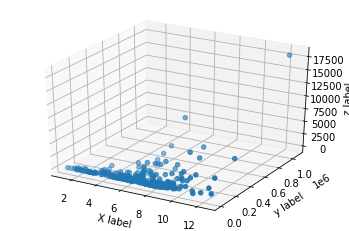

predicted response:
[[33.47055585]]
predicted response:
466    33.470556
dtype: float64


1
intercept: [171.08835215]
slope: [[1.46687426e+01 2.12304700e-03]]
coefficient of determination: 0.9682036514552028


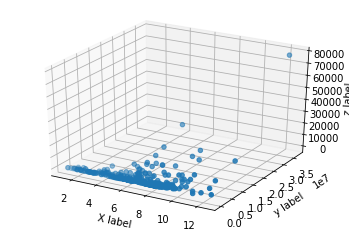

predicted response:
[[334.10216839]]
predicted response:
466    334.102168
dtype: float64


2
intercept: [573.35111309]
slope: [[8.34840105e+01 2.71813026e-03]]
coefficient of determination: 0.9666991621492176


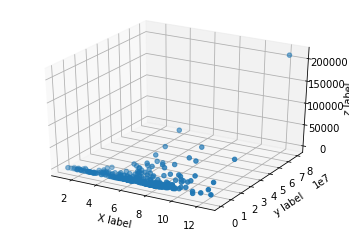

predicted response:
[[1351.2811729]]
predicted response:
466    1351.281173
dtype: float64


3
intercept: [2576.26244889]
slope: [[-3.53536900e+01  2.01941691e-02]]
coefficient of determination: 0.9710834815814504


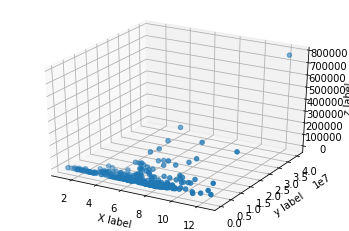

predicted response:
[[3061.89326729]]
predicted response:
466    3061.893267
dtype: float64


4
intercept: [-3348.90358923]
slope: [[6.77766537e+02 5.55329968e-02]]
coefficient of determination: 0.9915821097523679


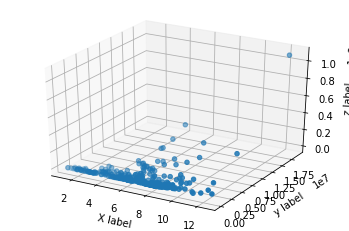

predicted response:
[[3127.19039435]]
predicted response:
466    3127.190394
dtype: float64


In [137]:
##Fornecendo os dados age_data

for i in range(5):
  print("")
  print("")
  x_test = age_data.iloc[466:467,[1,i+6]]
  x = np.array(age_data.iloc[0:465,[1,i+6]])#.reshape((-1, 1))
  y = np.array(age_data.iloc[0:465,[i+2]])
  #X_scaled = preprocessing.scale(x)
  #Y_scaled = preprocessing.scale(y)
  print(i)

  #Encontrando os coeficientes lineares e angulares
  model = LinearRegression().fit(x, y) #normalize=True
  intercept1, coefficients1 = model.intercept_, model.coef_
  print('intercept:', model.intercept_)
  print('slope:', model.coef_)

  #Encontrando R²
  r_sq = model.score(x, y)
  print('coefficient of determination:', r_sq)

  #Grafico
  X, Y, Z = x[:,0], x[:,1], y
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = "3d")
  ax.scatter(X, Y, Z)
  ax.set_xlabel('X label')
  ax.set_ylabel('y label')
  ax.set_zlabel('z label')
  plt.show()



  y_pred = model.predict(x_test)
  print('predicted response:', y_pred, sep='\n')
  y_pred = model.intercept_ + np.sum(model.coef_ * x_test, axis=1)
  print('predicted response:', y_pred, sep='\n')


In [127]:
age_data.iloc[466:467,[1,1+6]]

,pm25,population_14
466,7.979108,21653
